### Importing Libraries and Dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving bank-additional-full.csv to bank-additional-full.csv


In [7]:
import pandas as pd
import pandas as pd
from google.colab import files

bank_additional_full = list(uploaded.keys())[0] # Get the name of the uploaded file
df = pd.read_csv(bank_additional_full, sep=";")

df.head()
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Information about dataset

In [ ]:
print(df.shape)
print(df.columns)
print(df.info())


(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  

### Correcting Column names

In [ ]:

df.columns = [col.strip().replace('_', ' ').lower().capitalize() for col in df.columns]


### Handling Duplicates and Missing values

In [ ]:
## Handling Duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()

## Handling Missing Values
print(df.isnull().sum())
df_cleaned = df.dropna()


Number of duplicate rows: 12
Age               0
Job               0
Marital           0
Education         0
Default           0
Housing           0
Loan              0
Contact           0
Month             0
Day of week       0
Duration          0
Campaign          0
Pdays             0
Previous          0
Poutcome          0
Emp.var.rate      0
Cons.price.idx    0
Cons.conf.idx     0
Euribor3m         0
Nr.employed       0
Y                 0
dtype: int64


### Convereting Fields into correct data type

In [ ]:
### Convereting Numeric Fields to Correct Data Type
numeric_cols = [
    'Age', 'Duration', 'Campaign', 'Pdays', 'Previous',
    'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx',
    'Euribor3m', 'Nr.employed'
]

### Convert to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


### Convert to categorical Fields to Correct Data Type
categorical_cols = [
    'Job', 'Marital', 'Education','Default', 'Housing', 'Loan',
    'Contact', 'Month', 'Day.of.week', 'Poutcome', 'Y'
]

print(df.dtypes)

# Convert duration (seconds) to a time duration (HH:MM:SS format)
df['Duration'] = pd.to_timedelta(df['Duration'], unit='s')


df.head()

Age                 int64
Job                object
Marital            object
Education          object
Default            object
Housing            object
Loan               object
Contact            object
Month              object
Day of week        object
Duration            int64
Campaign            int64
Pdays               int64
Previous            int64
Poutcome           object
Emp.var.rate      float64
Cons.price.idx    float64
Cons.conf.idx     float64
Euribor3m         float64
Nr.employed       float64
Y                  object
dtype: object


,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day of week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Summary Statistics

In [ ]:
### Conducting Summary Statistics and Data Information
df.describe(include='all')     # Include categorical and numerical stats


,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day of week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,...,41176.000000,41176.000000,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,...,NaN,NaN,NaN,35551,NaN,NaN,NaN,NaN,NaN,36537
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567879,962.464810,0.173013,NaN,0.081922,93.575720,-40.502863,3.621293,5167.034870,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770318,186.937102,0.494964,NaN,1.570883,0.578839,4.627860,1.734437,72.251364,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Class Distribution

Y:
Y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

Marital:
Marital
married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: proportion, dtype: float64

Default:
Default
no         0.791165
unknown    0.208762
yes        0.000073
Name: proportion, dtype: float64

Housing:
Housing
yes        0.523873
no         0.452084
unknown    0.024043
Name: proportion, dtype: float64

Loan:
Loan
no         0.824218
yes        0.151739
unknown    0.024043
Name: proportion, dtype: float64

Poutcome:
Poutcome
nonexistent    0.863391
failure        0.103264
success        0.033345
Name: proportion, dtype: float64

Education:
Education
university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: proportion, dtype: float64



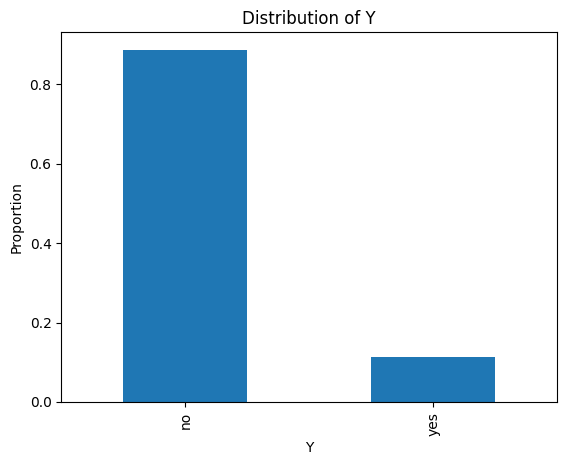

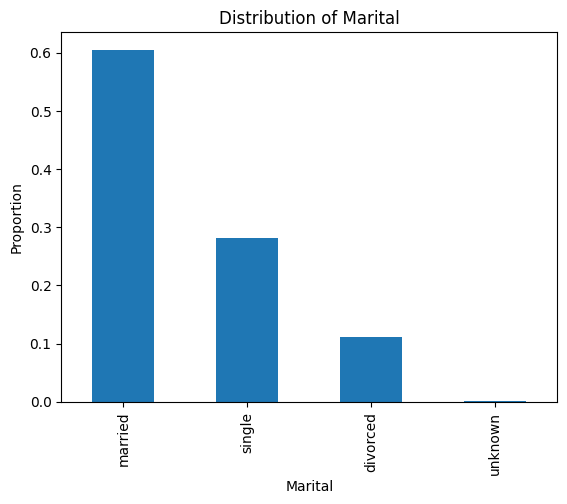

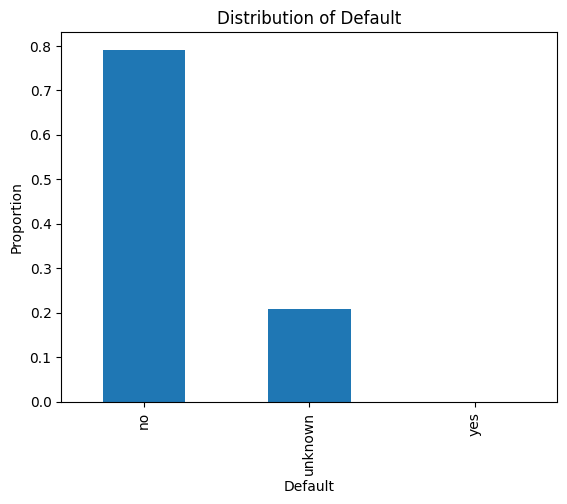

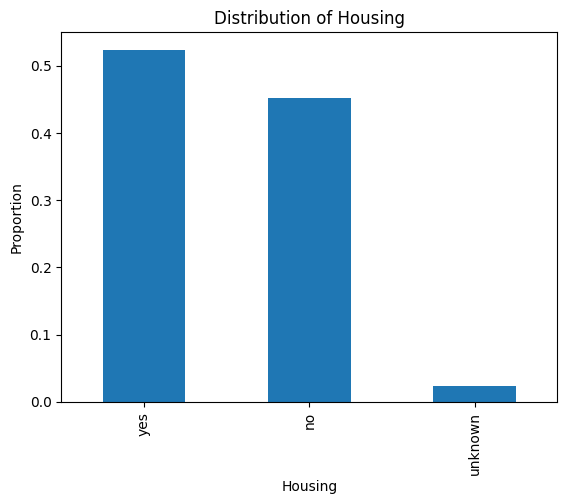

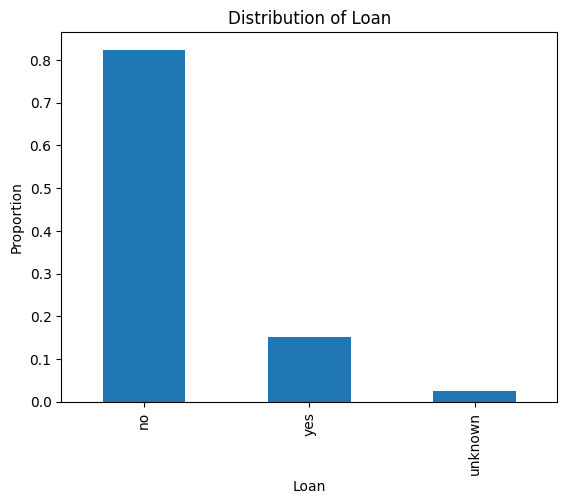

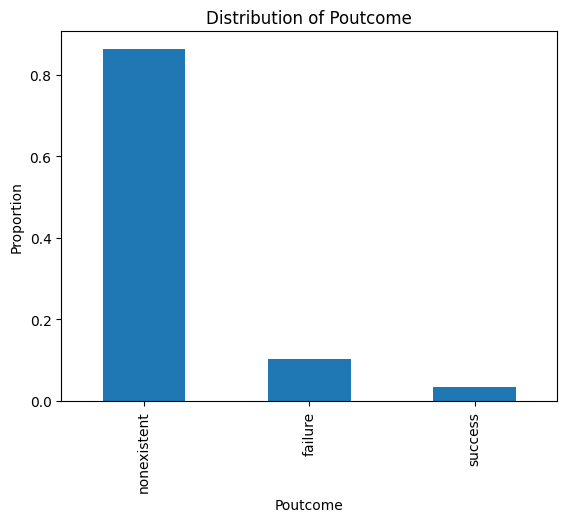

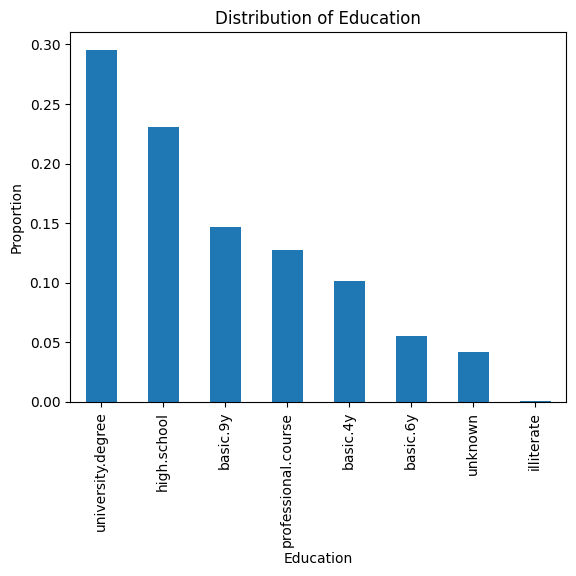

In [ ]:
### Checking for imbalance
columns_to_check = ['Y', 'Marital', 'Default', 'Housing', 'Loan', 'Poutcome', 'Education']

for col in columns_to_check:
    print(f"{col}:\n{df[col].value_counts(normalize=True)}\n")

import matplotlib.pyplot as plt

for col in columns_to_check:
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.show()


### Performing EDA

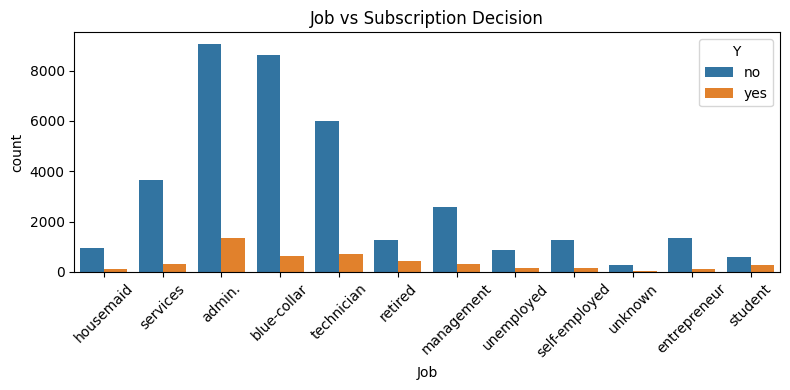

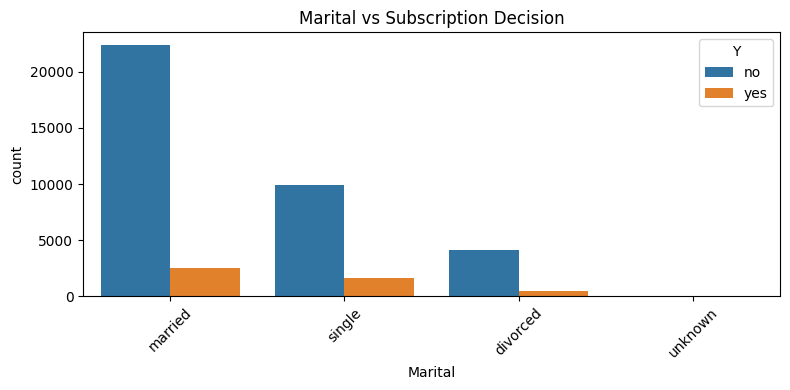

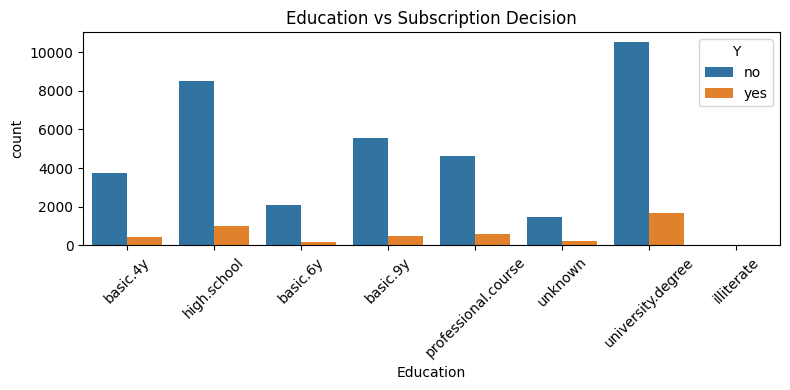

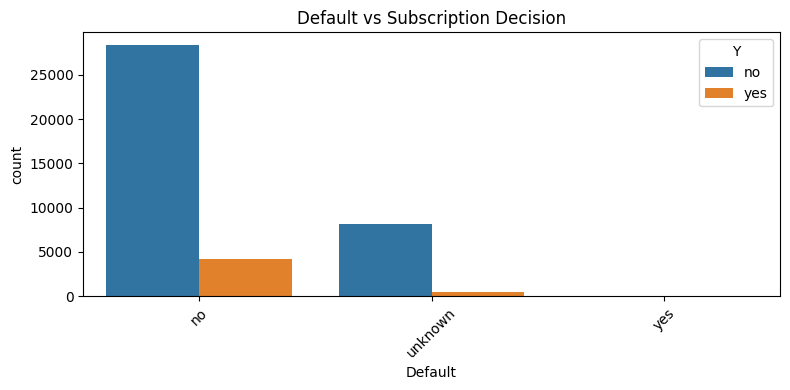

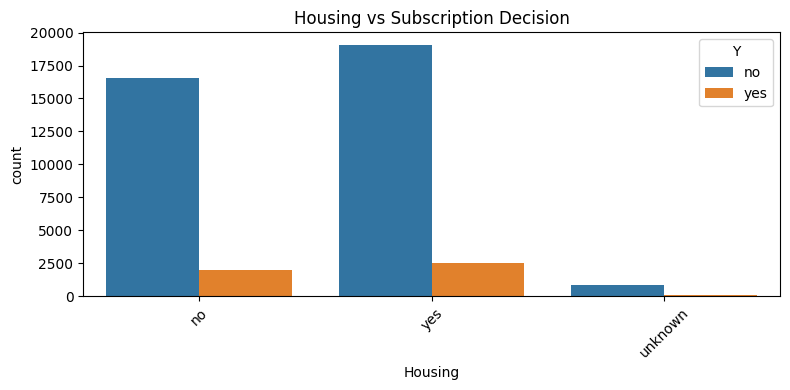

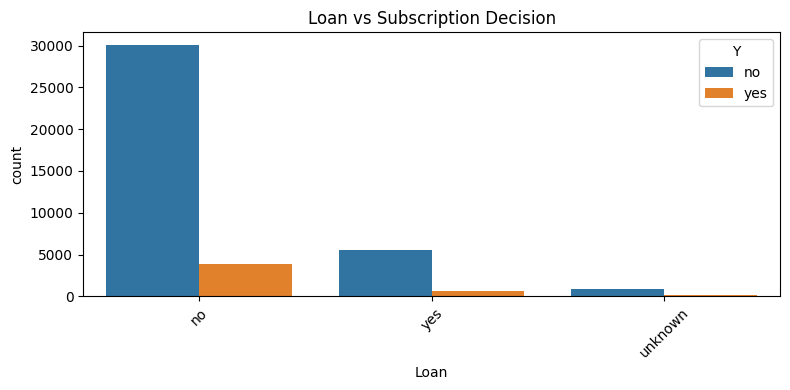

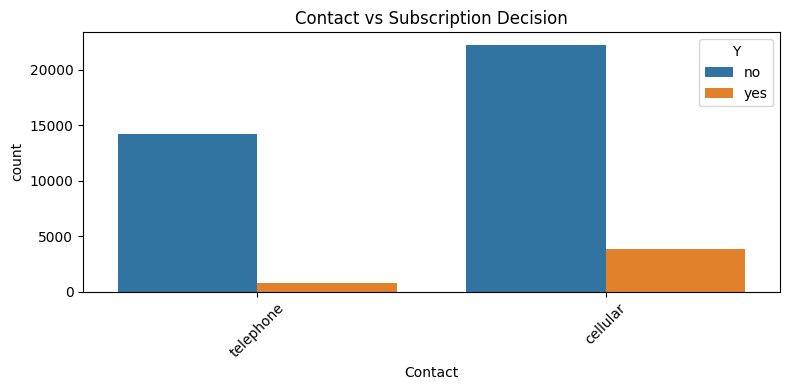

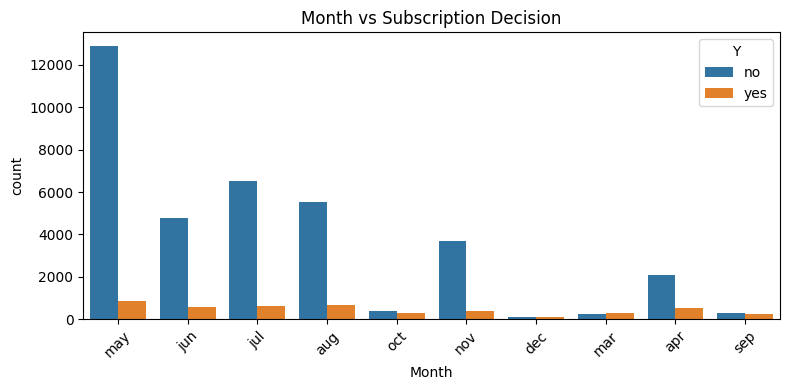

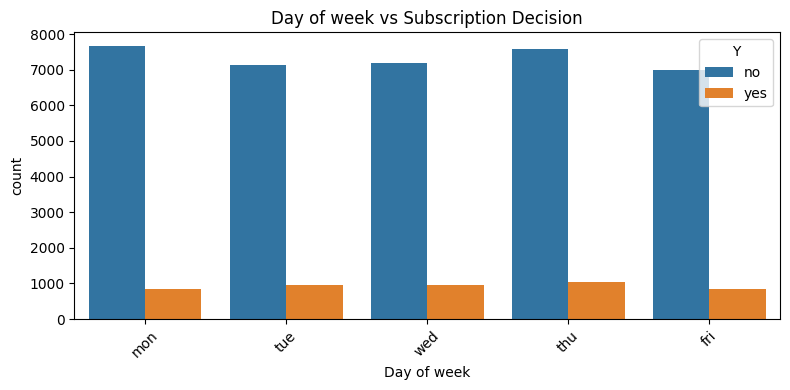

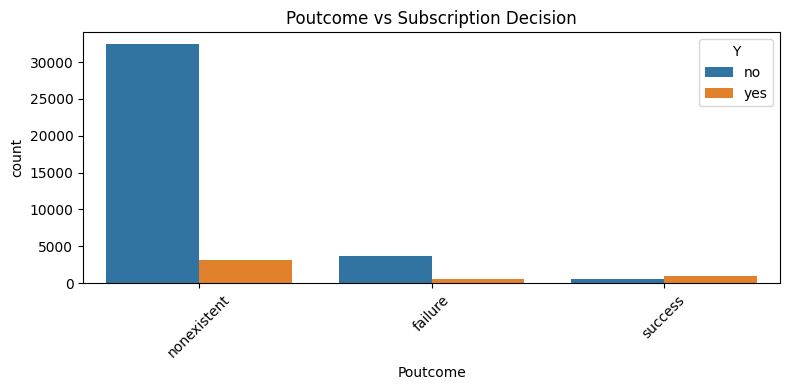

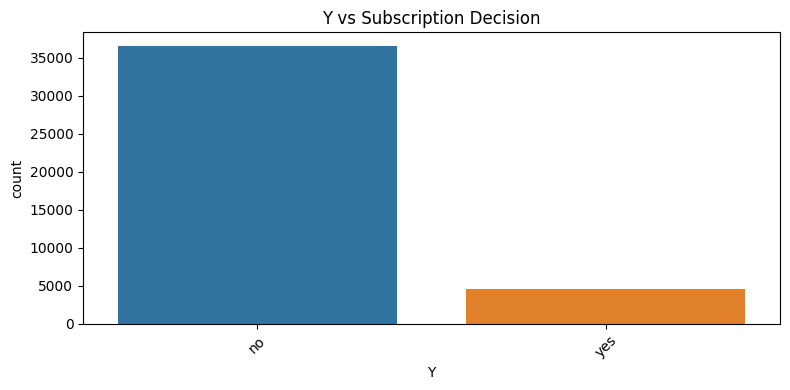

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Y')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Subscription Decision')
    plt.tight_layout()
    plt.show()


### Visualizing Numerical Fields

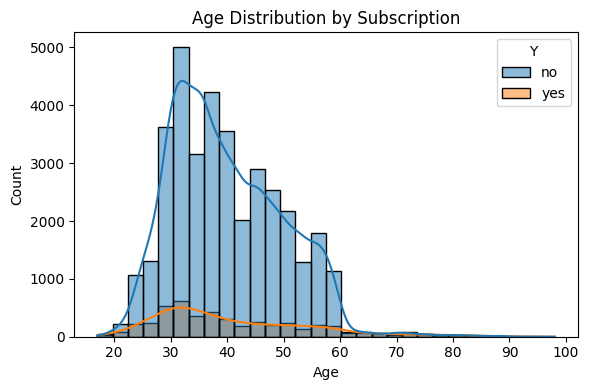

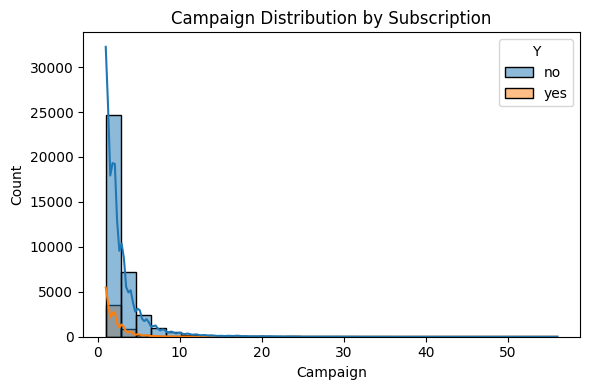

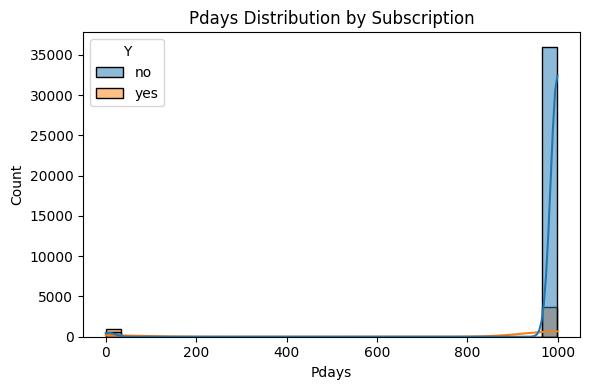

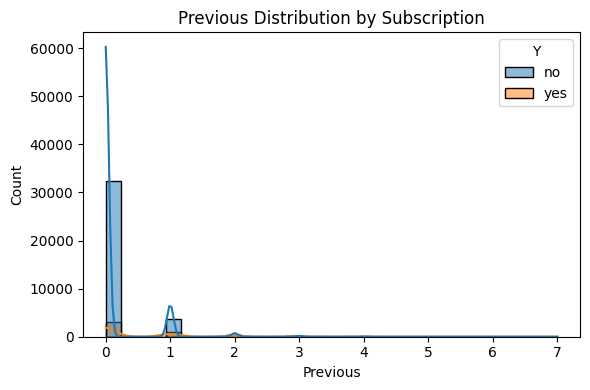

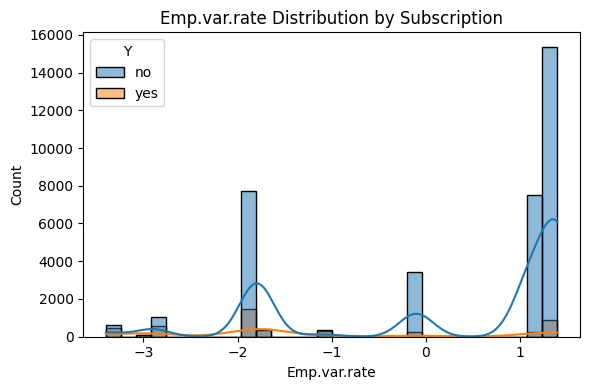

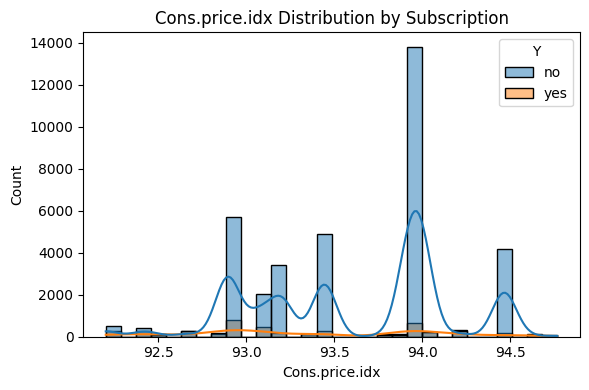

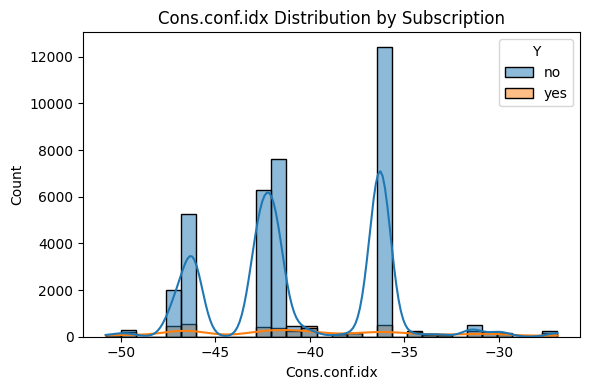

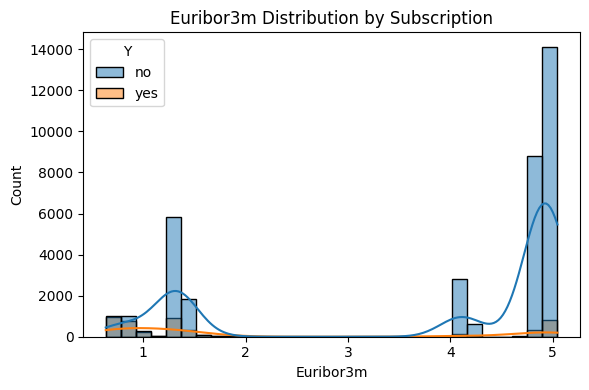

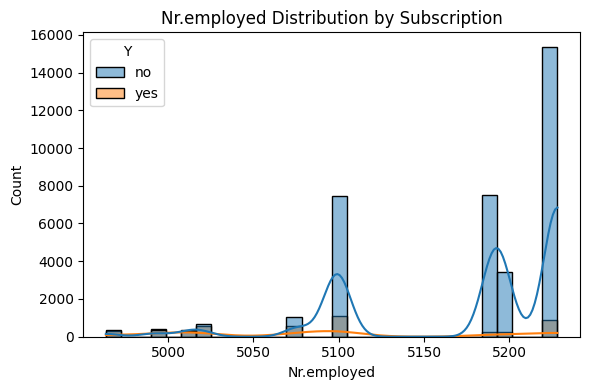

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Y', kde=True, bins=30)
    plt.title(f'{col} Distribution by Subscription')
    plt.tight_layout()
    plt.show()


### Detecting Outliers

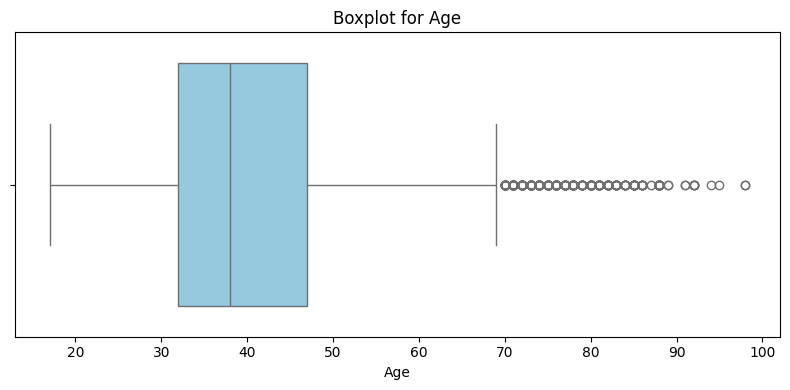

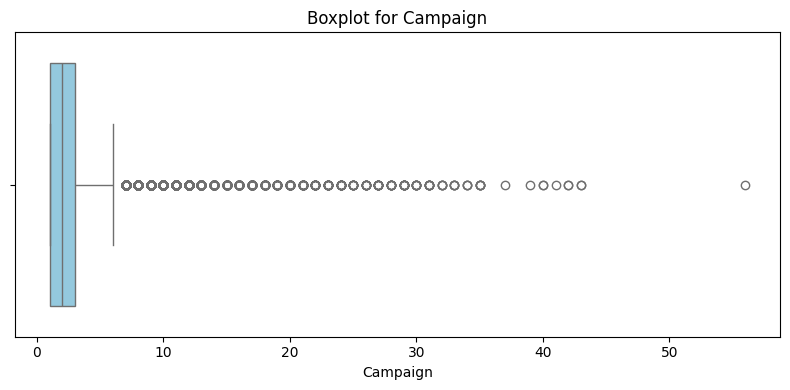

['Age', 'Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'Day of week', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed', 'Y']


In [ ]:
# Boxplots to detect outliers
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns for which to detect outliers
num_cols = [
    "Age",
    "Campaign",
]

# Generate boxplots for each numeric column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

print(df.columns.tolist())


### Boxplot

<Axes: xlabel='Y', ylabel='Age'>

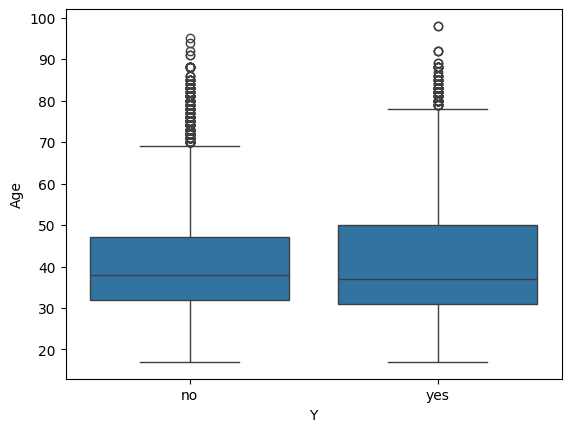

In [ ]:
sns.boxplot(data=df, x='Y', y='Age')

###sns.pairplot(df[['Age', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Y']], hue='Y')


### Finding the Correlation Matrix

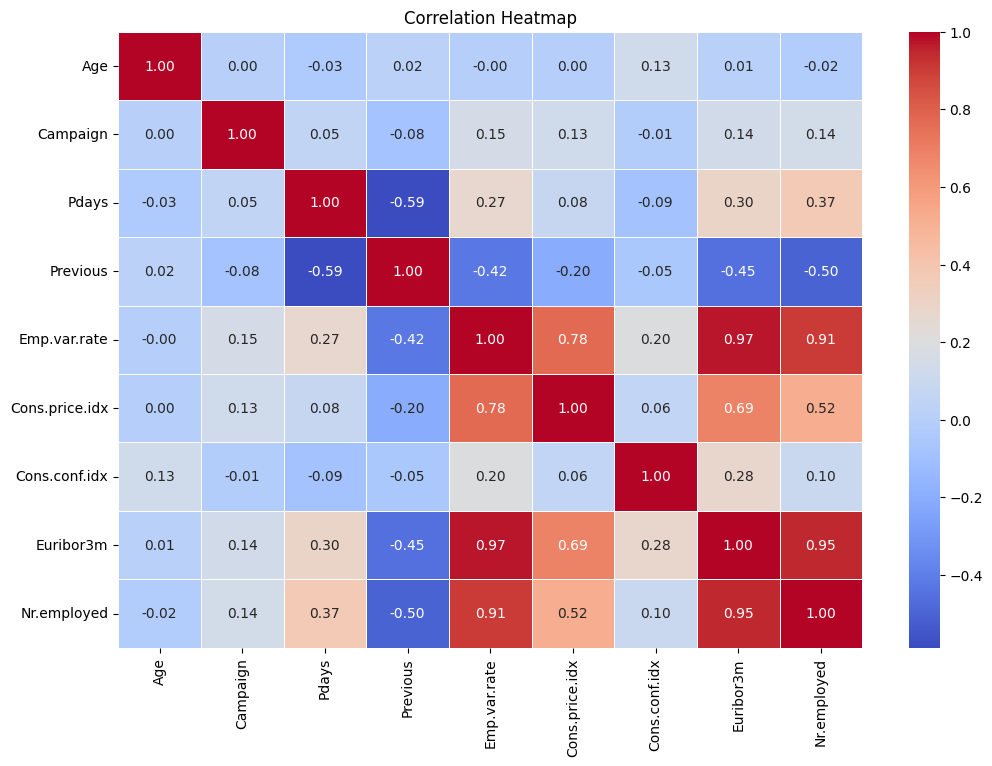

In [ ]:
### Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Axes: >

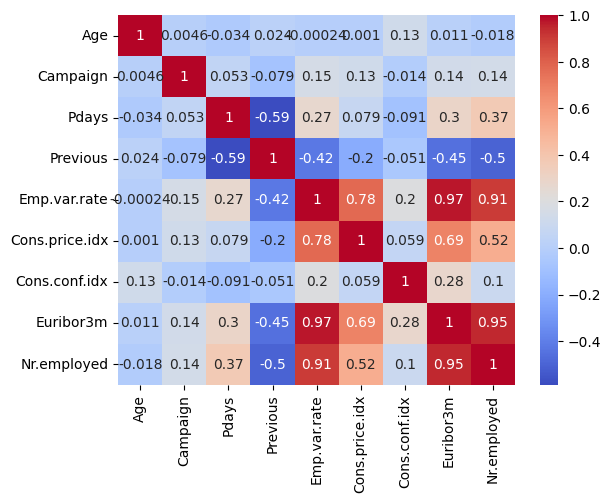

In [ ]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')


# Process of Featured Engineering

### Handle Problematic Column and Categorical Variables

In [ ]:
## Problematic Columns
df.drop(columns=["Duration"], inplace=True)

## Handling Norminal Categorical Variables
df = pd.get_dummies(df, columns=["Job", "Marital", "Contact", "Poutcome"], drop_first=True)

## Handling Ordinal Categorical Variables
education_order = {'unknown': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
                'high.school': 4, 'illiterate': 5, 'professional.course': 6, 'university.degree': 7}
df['Education'] = df['Education'].map(education_order)

print(df.columns.tolist())



['Age', 'Education', 'Default', 'Housing', 'Loan', 'Month', 'Day of week', 'Campaign', 'Pdays', 'Previous', 'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed', 'Y', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed', 'Job_unknown', 'Marital_married', 'Marital_single', 'Marital_unknown', 'Contact_telephone', 'Poutcome_nonexistent', 'Poutcome_success']


### Convert Columns into binary variables

In [ ]:
## binary variables
binary_map = {"yes": 1, "no": 0}
df["Housing"] = df["Housing"].map(binary_map)
df["Loan"] = df["Loan"].map(binary_map)
df["Default"] = df["Default"].map(binary_map)
df["Y"] = df["Y"].map(binary_map)


### Additional Features

In [ ]:
df["Initial Contact"] = df["Pdays"].apply(lambda x: 0 if x == -1 else 1)

# Optional: convert month to number
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df["Month_Num"] = df["Month"].map(month_map)

df["Combined_Contacts"] = df["Campaign"] + df["Previous"]

### Normalizing/Scaling Data

In [ ]:


from sklearn.preprocessing import StandardScaler

# Only scale continuous numerical variables
num_cols = [
    'Age', 'Campaign', 'Pdays', 'Previous',
    'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx',
    'Euribor3m', 'Nr.employed', 'Month_Num', 'Combined_Contacts'
]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.columns.tolist())


['Age', 'Education', 'Default', 'Housing', 'Loan', 'Month', 'Day of week', 'Campaign', 'Pdays', 'Previous', 'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed', 'Y', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed', 'Job_unknown', 'Marital_married', 'Marital_single', 'Marital_unknown', 'Contact_telephone', 'Poutcome_nonexistent', 'Poutcome_success', 'Initial Contact', 'Month_Num', 'Combined_Contacts']



### Dropping Unnecessary Columns

In [ ]:
X = df.drop("Y", axis=1)
y = df["Y"]


### Creating a Relationship with Y

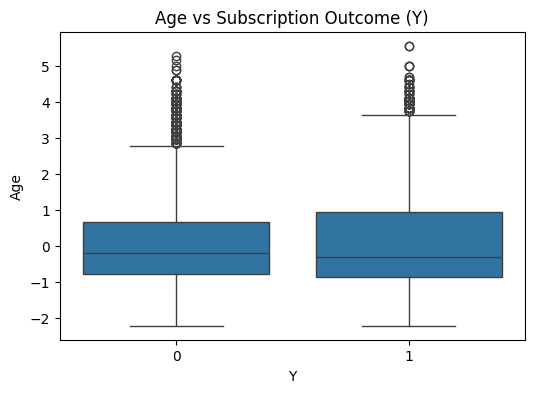

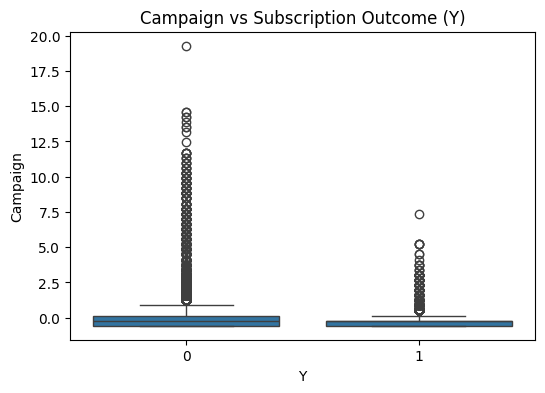

In [ ]:
for col in ['Age', 'Campaign']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Y', y=col, data=df)
    plt.title(f'{col} vs Subscription Outcome (Y)')
    plt.show()


### Handling Class Imbalance

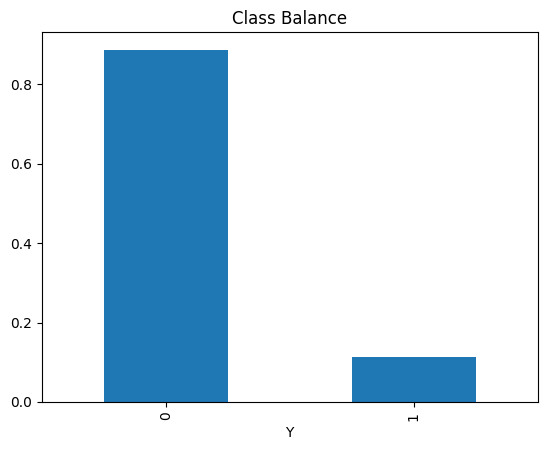

In [ ]:
# Check imbalance in target
df['Y'].value_counts(normalize=True).plot(kind='bar', title='Class Balance')
plt.show()


### OverSampling Imbalance

In [ ]:
from sklearn.linear_model import LogisticRegression

# Optionally fit the model (if you have X_train and y_train)
# model.fit(X_train, y_train)

model = LogisticRegression(class_weight='balanced')


# Building Predictive Models

### Using Logic Regression as a baseline model

In [ ]:
### Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


### Dropping Targets

In [ ]:
### Dropping the Target from the Feature Set
X = df.drop(columns=['Y'])
y = df['Y']  # Target


### Splitting the Train-Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train target mean:", y_train.mean())
print("Test target mean:", y_test.mean())

Train target mean: 0.11265938069216758
Test target mean: 0.11267605633802817


### Handling Clean Balances

### Training the Logistic Regresssion Model

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Drop non-numeric columns before fitting
X_train_numeric = X_train.drop(columns=['Month', 'Day of week'])

# Impute missing values (e.g., using the mean strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)

# Fit logistic regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_imputed, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Evalaution of Model

c:\Users\Kenneth\Downloads\data 1 (4)\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Kenneth\Downloads\data 1 (4)\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7308
           1       0.30      0.68      0.42       928

    accuracy                           0.79      8236
   macro avg       0.63      0.74      0.64      8236
weighted avg       0.88      0.79      0.82      8236



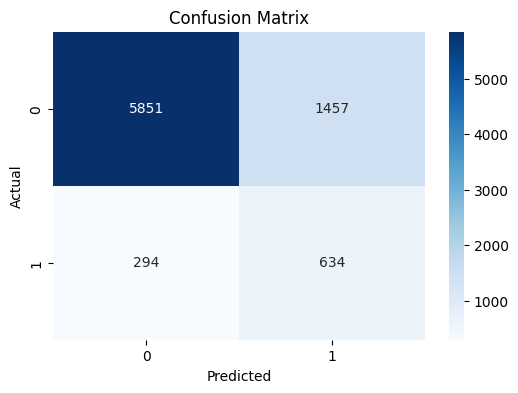

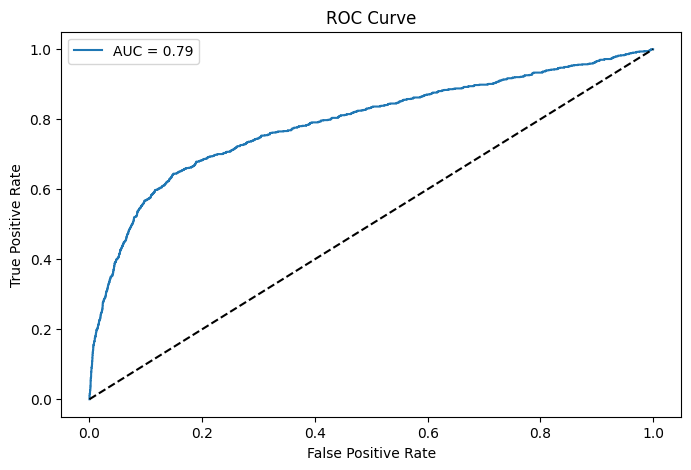

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure X_test is numeric and matches training structure
X_test_numeric = X_test.drop(columns=['Month', 'Day of week'])
X_test_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=X_test_numeric.columns)

# Predict class and probabilities
y_pred = logreg.predict(X_test_imputed)
y_proba = logreg.predict_proba(X_test_imputed)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Training Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Drop or encode non-numeric columns
X_train_clean = X_train.select_dtypes(include=['number'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_clean)

# Train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train_imputed, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

### Making Predictions

In [ ]:
# Ensure X_test has same preprocessing as X_train
X_test_clean = X_test.select_dtypes(include=['number'])  # Drop non-numeric columns if needed
X_test_imputed = imputer.transform(X_test_clean)         # Use the same imputer from training

# Predictions
y_pred = rf_model.predict(X_test_imputed)
y_proba = rf_model.predict_proba(X_test_imputed)[:, 1]  # Probabilities for positive class


### Evaluate Predictions

Accuracy: 0.883317144244779
Precision: 0.47254575707154745
Recall: 0.30603448275862066
F1 Score: 0.37148463047743624
ROC AUC Score: 0.7601769818856992

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7308
           1       0.47      0.31      0.37       928

    accuracy                           0.88      8236
   macro avg       0.69      0.63      0.65      8236
weighted avg       0.87      0.88      0.87      8236



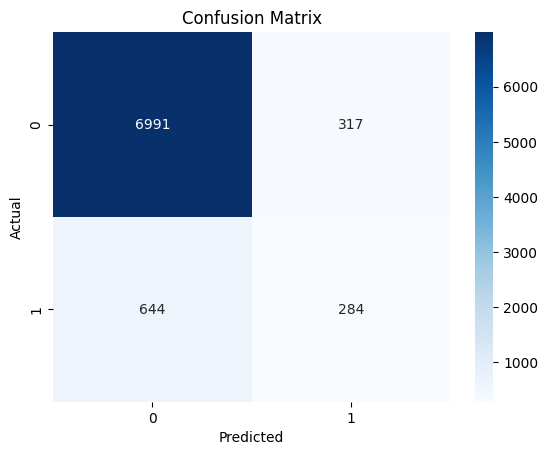

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Importance of Feature

In [ ]:
from sklearn.impute import SimpleImputer

# Drop non-numeric columns
X_train_numeric = X_train.drop(columns=['Month', 'Day of week'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)

# 🔹 Add this line to convert the numpy array back to DataFrame:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_numeric.columns)

# Now you can safely train your model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_imputed, y_train)

# And later:
feature_names = X_train_imputed.columns




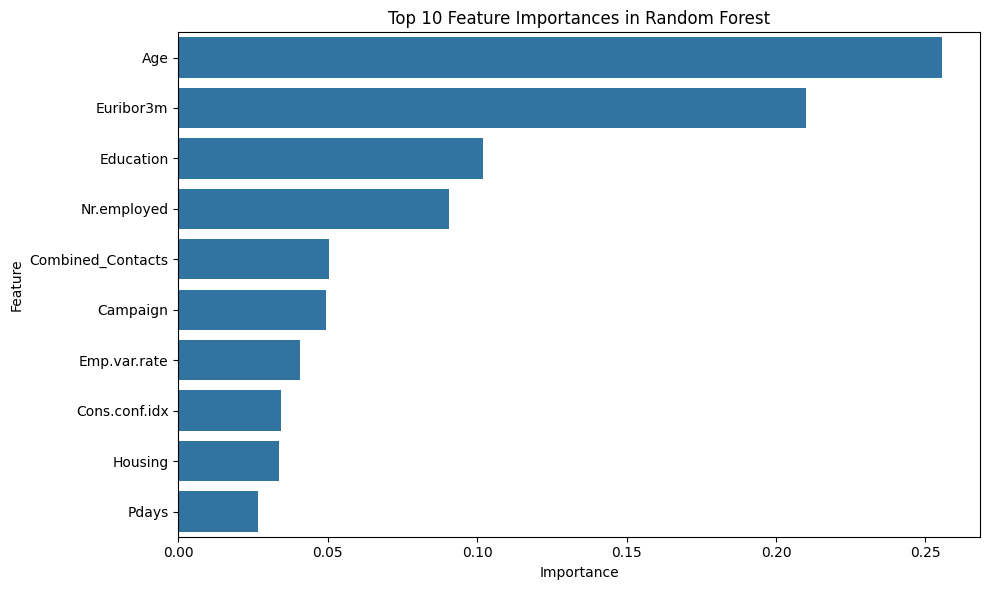

In [ ]:
# Use the feature names from the data used to train the Random Forest model
feature_names = X_train_clean.columns

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Build a DataFrame with the correct feature names and importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances in Random Forest')
plt.tight_layout()
plt.show()


## Insights, Findings and Recommendations

---

### Model Insights
 - **Top Essential Features**:
 1. Call Duration:
Clients who spend more time on the phone are more likely to subscribe, likely due to higher engagement or interest. While it's highly predictive, it should be used cautiously since the duration is only known after the call.

2. Contact Method:
Clients reached via cellular are more likely to subscribe than those contacted by landline, possibly due to better timing and availability. Future campaigns should prioritize cellular contacts.

3. Previous Outcome:
Clients with a past successful response to marketing are much more likely to subscribe again. Prioritize follow-ups with this group, as past success is a strong predictor of future conversion.

4. Month of Contact:
Subscription rates are higher in March, September, and December, and lower in May–July. Plan campaigns around peak months for better results, aligning with financial cycles or seasonal trends.

5. Education Level:
Clients with higher education levels are more likely to subscribe, likely due to greater financial understanding or income. Tailor marketing strategies to resonate with this segment.

6. Economic and Employment Variables:
Macroeconomic indicators (e.g., employment rate, consumer confidence) influence client decisions. Positive economic signals increase subscription likelihood; use this data to time and adjust campaign strategies.

---

### Model Findings
- **Key Findings**:
1. Imbalanced Classes: Most clients did not subscribe, leading to a class imbalance that can bias models toward predicting "no." To improve fairness and accuracy, apply techniques like SMOTE, undersampling, or class weight adjustments during training.

2. Call Duration: Longer calls are strongly linked to a "yes" response, indicating higher client interest or effective persuasion. Though not usable for pre-call prediction, it's valuable for analyzing past performance and improving call strategies.

3. Job, Education & Contact Method: Clients who are students, unemployed, or retired, and those with higher education levels, are more likely to subscribe. Cellular contact also leads to better conversion than landlines. Tailor messaging and prioritize mobile contacts for higher success rates.

4. Month of Contact: Subscription rates peak in March, September, and December, likely due to financial planning or seasonal factors. Focus marketing efforts during these high-performing months and reduce activity in less effective periods like May and July.

5. Previous Campaign Outcome: Clients with a past successful response are much more likely to subscribe again. Prioritize these individuals in future campaigns, using poutcome to guide targeted follow-ups.

---

### Recommendations
- **Key Recommendations**:
1. Target Cellular Contacts: Clients reached via mobile phones are more likely to subscribe, likely due to better accessibility. Focus future campaigns on cellular contacts for improved results.

2. Focus on Call Quality: Longer calls are linked to higher subscription rates, suggesting stronger interest or better agent-client interaction. Train agents to prioritize meaningful conversations over call volume.

3. Avoid Campaigns in May–July: Subscription rates drop during May to July, possibly due to financial fatigue. Shift marketing focus to higher-performing months like March, September, and December for better results.

4. Leverage Past Positive Responses: Clients with previous successful outcomes are more likely to subscribe again. Prioritize these individuals for follow-ups and personalized campaigns to boost conversion.

5. Prioritize Educated and Retired Clients: Clients with higher education, retirees, and students are more likely to subscribe, likely due to greater financial awareness or relevant goals. Focus marketing efforts on these segments with tailored messaging.

6. Prioritize Educated and Retired Clients: Clients with higher education, retirees, and students tend to have higher subscription rates—possibly due to better financial literacy or relevant savings goals. Tailor marketing messages to appeal to these high-potential groups.

7. Exclude Call Duration in Live Models: Call duration is only available after contact, so it shouldn't be used for real-time predictions. Use it instead for post-call analysis and improving agent performance.